In [1]:
# importing the various libraries

import folium
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import requests # library to handle requests
import lxml.html as lh
import bs4 as bs
import urllib.request
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [4]:
sg_df = pd.read_csv('/Users/shiqinchoo/Desktop/resources/sg_grouped.csv')
kl_df = pd.read_csv('/Users/shiqinchoo/Desktop/resources/kl_grouped.csv')

In [5]:
sg_df.head()

,Unnamed: 0,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wings Joint
0,0,Ang Mo Kio,0.0,0.0,0.0,0.00,0.0,0.0,0.040000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.00
1,1,Bedok,0.0,0.0,0.0,0.02,0.0,0.0,0.040000,0.0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.02
2,2,Bishan,0.0,0.0,0.0,0.00,0.0,0.0,0.025000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
3,3,Bukit Batok,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
4,4,Bukit Merah,0.0,0.0,0.0,0.00,0.0,0.0,0.038462,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00


In [6]:
kl_df.head()

,Unnamed: 0,Neighborhood,Yoga Studio,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Basketball Court,...,Train Station,Turkish Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Women's Store
0,0,Ampang Jaya,0.0,0.0,0.106383,0.00,0.021277,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.021277,0.0,0.021277,0.0,0.0,0.0
1,1,Bandar Tun Razak,0.0,0.0,0.052632,0.00,0.052632,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,2,Batu,0.0,0.0,0.000000,0.00,0.000000,0.05,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,3,Bukit Bintang,0.0,0.0,0.020000,0.02,0.000000,0.00,0.0,0.0,...,0.0,0.0,0.02,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,4,Cheras,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [7]:
sg_df = sg_df.dropna()

In [9]:
sg_df.head()

,Unnamed: 0,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wings Joint
0,0,Ang Mo Kio,0.0,0.0,0.0,0.00,0.0,0.0,0.040000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.00
1,1,Bedok,0.0,0.0,0.0,0.02,0.0,0.0,0.040000,0.0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.02
2,2,Bishan,0.0,0.0,0.0,0.00,0.0,0.0,0.025000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
3,3,Bukit Batok,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
4,4,Bukit Merah,0.0,0.0,0.0,0.00,0.0,0.0,0.038462,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00


In [10]:
kl_df = kl_df.dropna()

In [11]:
kl_df.head()

,Unnamed: 0,Neighborhood,Yoga Studio,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Basketball Court,...,Train Station,Turkish Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Women's Store
0,0,Ampang Jaya,0.0,0.0,0.106383,0.00,0.021277,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.021277,0.0,0.021277,0.0,0.0,0.0
1,1,Bandar Tun Razak,0.0,0.0,0.052632,0.00,0.052632,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,2,Batu,0.0,0.0,0.000000,0.00,0.000000,0.05,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,3,Bukit Bintang,0.0,0.0,0.020000,0.02,0.000000,0.00,0.0,0.0,...,0.0,0.0,0.02,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,4,Cheras,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [13]:
sg_df = sg_df.drop(['Unnamed: 0'], axis = 1)

In [14]:
sg_df.head()

,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wings Joint
0,Ang Mo Kio,0.0,0.0,0.0,0.00,0.0,0.0,0.040000,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.00
1,Bedok,0.0,0.0,0.0,0.02,0.0,0.0,0.040000,0.0,0.0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.02
2,Bishan,0.0,0.0,0.0,0.00,0.0,0.0,0.025000,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
3,Bukit Batok,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
4,Bukit Merah,0.0,0.0,0.0,0.00,0.0,0.0,0.038462,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00


In [15]:
kl_df = kl_df.drop(['Unnamed: 0'], axis = 1)
kl_df.head()

,Neighborhood,Yoga Studio,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Basketball Court,Beer Bar,...,Train Station,Turkish Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Women's Store
0,Ampang Jaya,0.0,0.0,0.106383,0.00,0.021277,0.00,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.021277,0.0,0.021277,0.0,0.0,0.0
1,Bandar Tun Razak,0.0,0.0,0.052632,0.00,0.052632,0.00,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,Batu,0.0,0.0,0.000000,0.00,0.000000,0.05,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,Bukit Bintang,0.0,0.0,0.020000,0.02,0.000000,0.00,0.0,0.0,0.02,...,0.0,0.0,0.02,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,Cheras,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [23]:
sg_list = sg_df.columns
len(sg_list)

152

In [26]:
sg_list = sg_list.drop(['Neighborhood'])
sg_list

Index(['Yoga Studio', 'ATM', 'Accessories Store', 'American Restaurant',
       'Arcade', 'Arts & Crafts Store', 'Asian Restaurant',
       'Athletics & Sports', 'BBQ Joint', 'Bagel Shop',
       ...
       'Theme Park', 'Thrift / Vintage Store', 'Toy / Game Store', 'Track',
       'Trail', 'Train Station', 'Vegetarian / Vegan Restaurant',
       'Video Game Store', 'Wine Bar', 'Wings Joint'],
      dtype='object', length=151)

In [28]:
kl_list = kl_df.columns
kl_list = kl_list.drop(['Neighborhood'])
kl_list

Index(['Yoga Studio', 'American Restaurant', 'Asian Restaurant', 'BBQ Joint',
       'Bakery', 'Bar', 'Baseball Field', 'Basketball Court', 'Beer Bar',
       'Betting Shop',
       ...
       'Train Station', 'Turkish Restaurant', 'Udon Restaurant', 'Vape Store',
       'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Volleyball Court', 'Wine Bar',
       'Women's Store'],
      dtype='object', length=153)

In [50]:
from sklearn.preprocessing import MinMaxScaler
sg_x = sg_df[sg_list].values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_sgx = min_max_scaler.fit_transform(sg_x)
feature_sgx [0:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.28571429, 0.        , 0.        , 0.        ,
        0.25      , 0.6       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.53333333, 0.        , 0.        , 0.92      ,
        0.        , 0.        , 0.1       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07428571,
        0.        , 0.        , 0.        , 0.32      , 0.52      ,
        0.        , 0.48      , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.46      , 0.        , 0.        , 0.        ,
        0.4       , 0.        , 0.        , 0.46      , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.46      , 0.5       , 0.        , 0.98      , 0.        ,
        1.        , 0.        , 0.        , 0.  

In [51]:
sg_dist_matrix = distance_matrix(feature_sgx,feature_sgx) 
print(dist_matrix)

[[0.         4.31552509 4.70870279 5.34643551 3.64588552 4.21120493
  4.15156042 3.77936818 3.9986003  4.15039638 3.82001733 4.24819827
  3.93876195 3.6712855  4.59338887 3.65140517 4.14281038 4.1807534
  3.68162562 3.92486618 4.83920563 4.59426964]
 [4.31552509 0.         4.88300764 5.50870586 3.80448798 4.32813339
  4.6555438  3.8252732  4.36623679 4.30502457 3.88995415 4.78199183
  3.90329255 4.12145041 4.78181024 3.81973552 4.11702469 4.59382959
  3.91251671 4.11985639 4.98845235 4.64417585]
 [4.70870279 4.88300764 0.         5.52333121 4.1042196  4.83556041
  4.87187366 4.26344178 4.08275894 4.4087552  4.36287606 4.84636933
  4.29100369 4.3117304  5.06419911 4.19463893 4.50954283 4.62300137
  4.01696111 4.60272566 5.00549215 4.99749835]
 [5.34643551 5.50870586 5.52333121 0.         5.01296849 5.28370786
  5.30483349 4.96608995 5.22751408 5.28994355 5.09688939 5.66097809
  5.10469854 4.75955874 4.93409722 4.87148775 5.2935065  5.48616476
  4.98208903 5.07242354 5.78252147 5.6843417

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

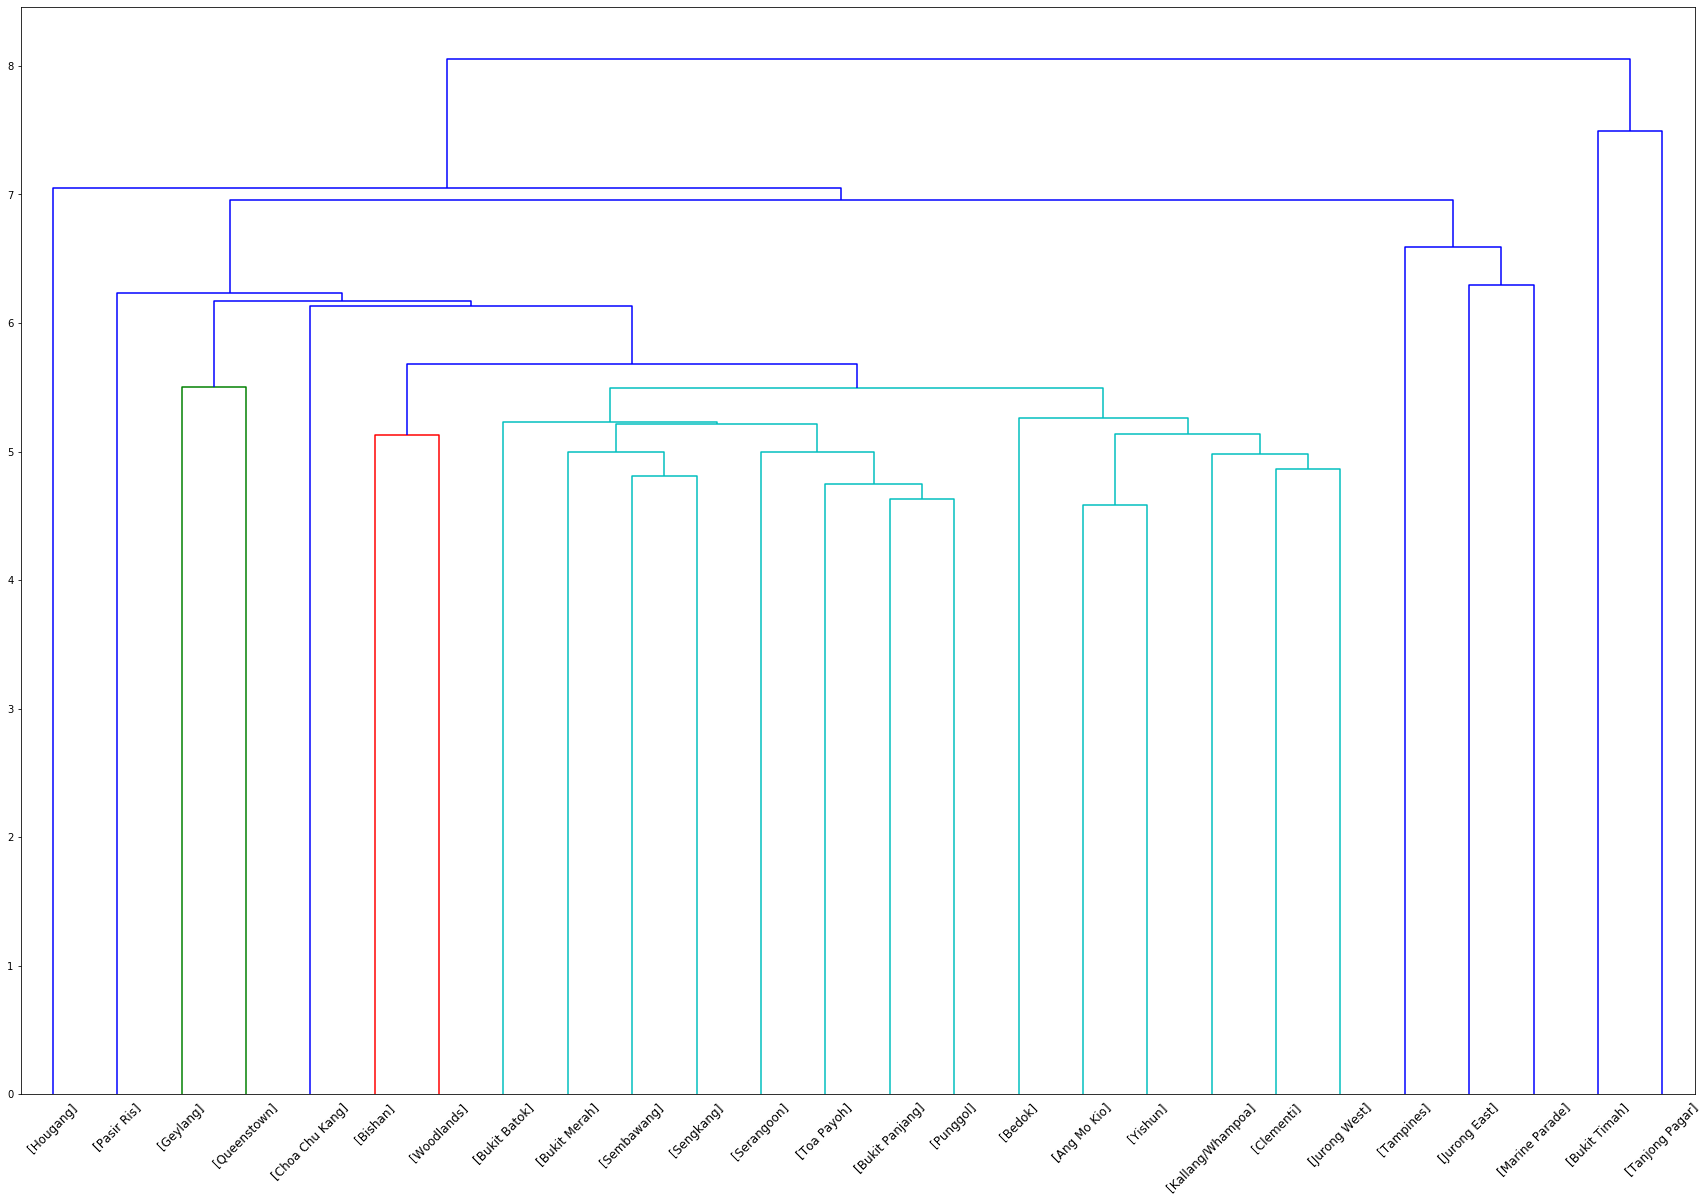

In [59]:
import pylab
fig = pylab.figure(figsize=(30,20))
def llf(id):
    return '[%s]' % (sg_df['Neighborhood'][id] )
    
dendro = hierarchy.dendrogram(sg_Z,  leaf_label_func=llf, leaf_rotation=45, leaf_font_size =12, orientation = 'top')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


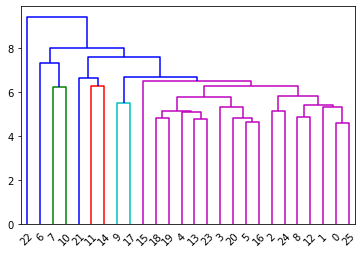

In [52]:


sg_Z = hierarchy.linkage(sg_dist_matrix, 'complete')
sg_dendro = dendrogram(sg_Z)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


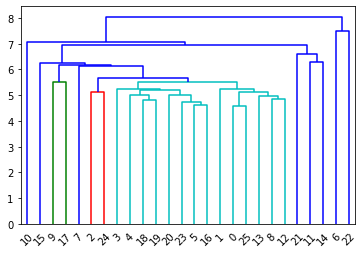

In [53]:
sg_Z = hierarchy.linkage(sg_dist_matrix, 'average')
dendro = hierarchy.dendrogram(sg_Z)

In [33]:
kl_x = kl_df[kl_list].values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_klx = min_max_scaler.fit_transform(kl_x)
feature_klx [0:5]

array([[0.        , 0.        , 0.53191489, 0.        , 0.40425532,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.76595745, 0.        , 0.        , 0.        , 0.21276596,
        0.        , 0.43085106, 0.        , 0.27659574, 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.40425532, 0.        , 0.08510638, 0.        ,
        0.        , 0.12765957, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12765957, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.14184397, 0.        , 0.        , 0.        ,
        0.16489362, 1.        , 0.        , 0.  

In [35]:
dist_matrix = distance_matrix(feature_klx,feature_klx) 
print(dist_matrix)

[[0.         4.31552509 4.70870279 5.34643551 3.64588552 4.21120493
  4.15156042 3.77936818 3.9986003  4.15039638 3.82001733 4.24819827
  3.93876195 3.6712855  4.59338887 3.65140517 4.14281038 4.1807534
  3.68162562 3.92486618 4.83920563 4.59426964]
 [4.31552509 0.         4.88300764 5.50870586 3.80448798 4.32813339
  4.6555438  3.8252732  4.36623679 4.30502457 3.88995415 4.78199183
  3.90329255 4.12145041 4.78181024 3.81973552 4.11702469 4.59382959
  3.91251671 4.11985639 4.98845235 4.64417585]
 [4.70870279 4.88300764 0.         5.52333121 4.1042196  4.83556041
  4.87187366 4.26344178 4.08275894 4.4087552  4.36287606 4.84636933
  4.29100369 4.3117304  5.06419911 4.19463893 4.50954283 4.62300137
  4.01696111 4.60272566 5.00549215 4.99749835]
 [5.34643551 5.50870586 5.52333121 0.         5.01296849 5.28370786
  5.30483349 4.96608995 5.22751408 5.28994355 5.09688939 5.66097809
  5.10469854 4.75955874 4.93409722 4.87148775 5.2935065  5.48616476
  4.98208903 5.07242354 5.78252147 5.6843417

In [36]:
kl_dist_matrix = distance_matrix(feature_klx,feature_klx) 
print(kl_dist_matrix)

[[0.         4.31552509 4.70870279 5.34643551 3.64588552 4.21120493
  4.15156042 3.77936818 3.9986003  4.15039638 3.82001733 4.24819827
  3.93876195 3.6712855  4.59338887 3.65140517 4.14281038 4.1807534
  3.68162562 3.92486618 4.83920563 4.59426964]
 [4.31552509 0.         4.88300764 5.50870586 3.80448798 4.32813339
  4.6555438  3.8252732  4.36623679 4.30502457 3.88995415 4.78199183
  3.90329255 4.12145041 4.78181024 3.81973552 4.11702469 4.59382959
  3.91251671 4.11985639 4.98845235 4.64417585]
 [4.70870279 4.88300764 0.         5.52333121 4.1042196  4.83556041
  4.87187366 4.26344178 4.08275894 4.4087552  4.36287606 4.84636933
  4.29100369 4.3117304  5.06419911 4.19463893 4.50954283 4.62300137
  4.01696111 4.60272566 5.00549215 4.99749835]
 [5.34643551 5.50870586 5.52333121 0.         5.01296849 5.28370786
  5.30483349 4.96608995 5.22751408 5.28994355 5.09688939 5.66097809
  5.10469854 4.75955874 4.93409722 4.87148775 5.2935065  5.48616476
  4.98208903 5.07242354 5.78252147 5.6843417

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


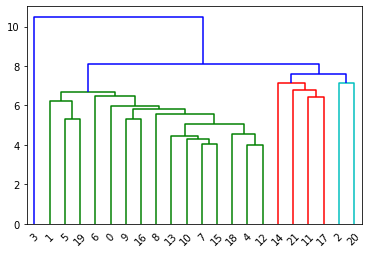

In [37]:
kl_Z = hierarchy.linkage(kl_dist_matrix, 'complete')
dendro = hierarchy.dendrogram(kl_Z)

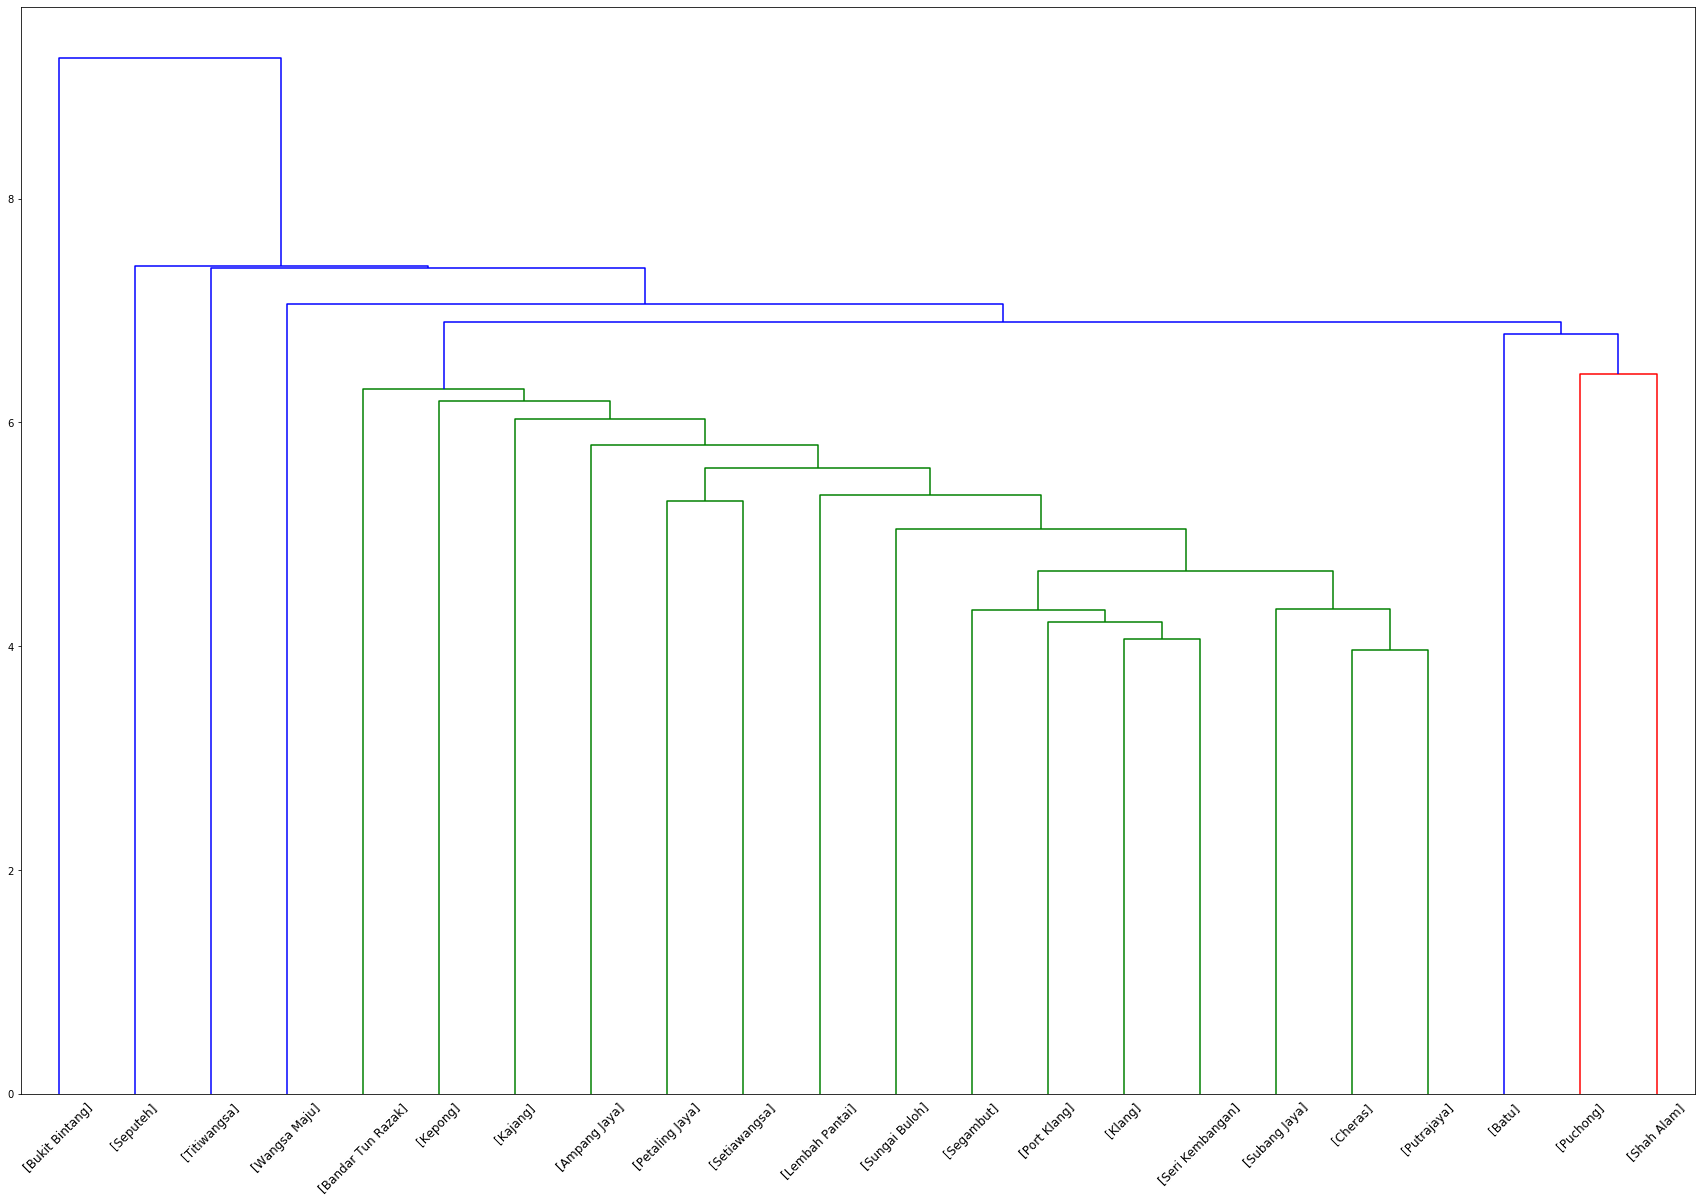

In [153]:
import pylab
kl_fig = pylab.figure(figsize=(30,20))
def kl_llf(id):
    return '[%s]' % (kl_df['Neighborhood'][id] )
    
dendro = hierarchy.dendrogram(kl_Z,  leaf_label_func=kl_llf, leaf_rotation=45, leaf_font_size =12, orientation = 'top')

In [62]:
import pandas as pd
sg_n = pd.read_csv('/Users/shiqinchoo/Desktop/resources/sg_towns.csv')
kl_n = pd.read_csv('/Users/shiqinchoo/Desktop/resources/kl_districts.csv')

In [66]:
sg_n

,Unnamed: 0,Neighbourhoods,Latitude,Longitude
0,0,Ang Mo Kio,1.371285,103.846994
1,1,Bedok,1.325928,103.931813
2,2,Bishan,1.348933,103.848906
3,3,Bukit Batok,1.348283,103.749019
4,4,Bukit Merah,1.283919,103.817807
5,5,Bukit Panjang,1.377921,103.771866
6,6,Bukit Timah,1.329448,103.794166
7,7,Choa Chu Kang,1.384896,103.743005
8,8,Clementi,1.313218,103.765086
9,9,Geylang,1.318186,103.887056


In [68]:
sg_new = pd.DataFrame()
sg_new['Name'] = sg_n['Neighbourhoods']
sg_new['Latitutde'] = sg_n['Latitude']
sg_new['Longitude'] = sg_n['Longitude']
sg_new

,Name,Latitutde,Longitude
0,Ang Mo Kio,1.371285,103.846994
1,Bedok,1.325928,103.931813
2,Bishan,1.348933,103.848906
3,Bukit Batok,1.348283,103.749019
4,Bukit Merah,1.283919,103.817807
5,Bukit Panjang,1.377921,103.771866
6,Bukit Timah,1.329448,103.794166
7,Choa Chu Kang,1.384896,103.743005
8,Clementi,1.313218,103.765086
9,Geylang,1.318186,103.887056


In [67]:
kl_n

,Unnamed: 0,Name,Latitudes,Longitudes
0,0,Bandar Tun Razak,3.0920,101.7211
1,1,Batu,3.1390,101.6869
2,2,Bukit Bintang,3.1468,101.7113
3,3,Cheras,3.1068,101.7259
4,4,Kepong,3.2140,101.6350
5,5,Lembah Pantai,3.1252,101.6683
6,6,Segambut,3.1917,101.6734
7,7,Seputeh,3.1150,101.6797
8,8,Setiawangsa,3.1830,101.7462
9,9,Titiwangsa,3.1774,101.7077


In [69]:
kl_new = pd.DataFrame()
kl_new['Name'] = kl_n['Name']
kl_new['Latitude'] = kl_n['Latitudes']
kl_new['Longitude'] = kl_n['Longitudes']
kl_new

,Name,Latitude,Longitude
0,Bandar Tun Razak,3.0920,101.7211
1,Batu,3.1390,101.6869
2,Bukit Bintang,3.1468,101.7113
3,Cheras,3.1068,101.7259
4,Kepong,3.2140,101.6350
5,Lembah Pantai,3.1252,101.6683
6,Segambut,3.1917,101.6734
7,Seputeh,3.1150,101.6797
8,Setiawangsa,3.1830,101.7462
9,Titiwangsa,3.1774,101.7077


In [85]:
list(sg_new['Name'])

['Ang Mo Kio',
 'Bedok',
 'Bishan',
 'Bukit Batok',
 'Bukit Merah',
 'Bukit Panjang',
 'Bukit Timah',
 'Choa Chu Kang',
 'Clementi',
 'Geylang',
 'Hougang',
 'Jurong East',
 'Jurong West',
 'Kallang/Whampoa',
 'Marine Parade',
 'Pasir Ris',
 'Punggol',
 'Queenstown',
 'Sembawang',
 'Sengkang',
 'Serangoon',
 'Tampines',
 'Tanjong Pagar',
 'Toa Payoh',
 'Woodlands',
 'Yishun']

In [86]:
list(kl_new['Name'])

['Bandar Tun Razak',
 'Batu',
 'Bukit Bintang',
 'Cheras',
 'Kepong',
 'Lembah Pantai',
 'Segambut',
 'Seputeh',
 'Setiawangsa',
 'Titiwangsa',
 'Wangsa Maju',
 'Subang Jaya',
 'Petaling Jaya',
 'Putrajaya',
 'Kajang',
 'Klang',
 'Puchong',
 'Port Klang',
 'Sungai Buloh',
 'Ampang Jaya',
 'Shah Alam',
 'Seri Kembangan']

In [89]:
sg_name_list = list(sg_new['Name'])
kl_name_list = list(kl_new['Name'])
cities_list = sg_name_list + kl_name_list
cities_list

['Ang Mo Kio',
 'Bedok',
 'Bishan',
 'Bukit Batok',
 'Bukit Merah',
 'Bukit Panjang',
 'Bukit Timah',
 'Choa Chu Kang',
 'Clementi',
 'Geylang',
 'Hougang',
 'Jurong East',
 'Jurong West',
 'Kallang/Whampoa',
 'Marine Parade',
 'Pasir Ris',
 'Punggol',
 'Queenstown',
 'Sembawang',
 'Sengkang',
 'Serangoon',
 'Tampines',
 'Tanjong Pagar',
 'Toa Payoh',
 'Woodlands',
 'Yishun',
 'Bandar Tun Razak',
 'Batu',
 'Bukit Bintang',
 'Cheras',
 'Kepong',
 'Lembah Pantai',
 'Segambut',
 'Seputeh',
 'Setiawangsa',
 'Titiwangsa',
 'Wangsa Maju',
 'Subang Jaya',
 'Petaling Jaya',
 'Putrajaya',
 'Kajang',
 'Klang',
 'Puchong',
 'Port Klang',
 'Sungai Buloh',
 'Ampang Jaya',
 'Shah Alam',
 'Seri Kembangan']

In [90]:
len(cities_list)

48

In [92]:
sg_name_lat = list(sg_new['Latitutde'])
kl_name_lat = list(kl_new['Latitude'])
cities_lat = sg_name_lat + kl_name_lat
sg_name_long = list(sg_new['Longitude'])
kl_name_long = list(kl_new['Longitude'])
cities_long = sg_name_long + kl_name_long

In [93]:
cities = pd.DataFrame()
cities['Areas'] = cities_list
cities['Latitude'] = cities_lat
cities['Longitude'] = cities_long
cities

,Areas,Latitude,Longitude
0,Ang Mo Kio,1.371285,103.846994
1,Bedok,1.325928,103.931813
2,Bishan,1.348933,103.848906
3,Bukit Batok,1.348283,103.749019
4,Bukit Merah,1.283919,103.817807
5,Bukit Panjang,1.377921,103.771866
6,Bukit Timah,1.329448,103.794166
7,Choa Chu Kang,1.384896,103.743005
8,Clementi,1.313218,103.765086
9,Geylang,1.318186,103.887056


In [94]:
#creating the API call
CLIENT_ID = 'FMOVI2TV0X0ADLHYSKK2NDDWF2AL5PZJ2DWEII2G11OSFH1S' # your Foursquare ID
CLIENT_SECRET = '0IG2HMFEHHN4LO1JOBN1SIB4LGA24HDGOGGMA3JVMPCIUICV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [95]:
#creating a helper function for the api call to obtain the venues around the neighbourhoods
LIMIT = 50
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [97]:
#calling the API for the variou neighbourhoods. 
cities_venues = getNearbyVenues(names=cities['Areas'],
                                   latitudes=cities['Latitude'],
                                   longitudes=cities['Longitude']
                                  )

Ang Mo Kio
Bedok
Bishan
Bukit Batok
Bukit Merah
Bukit Panjang
Bukit Timah
Choa Chu Kang
Clementi
Geylang
Hougang
Jurong East
Jurong West
Kallang/Whampoa
Marine Parade
Pasir Ris
Punggol
Queenstown
Sembawang
Sengkang
Serangoon
Tampines
Tanjong Pagar
Toa Payoh
Woodlands
Yishun
Bandar Tun Razak
Batu
Bukit Bintang
Cheras
Kepong
Lembah Pantai
Segambut
Seputeh
Setiawangsa
Titiwangsa
Wangsa Maju
Subang Jaya
Petaling Jaya
Putrajaya
Kajang
Klang
Puchong
Port Klang
Sungai Buloh
Ampang Jaya
Shah Alam
Seri Kembangan


In [106]:
print('The shape of venues is: ', cities_venues.shape)
cities_venues.head(20)

The shape of venues is:  (1480, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ang Mo Kio,1.371285,103.846994,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House
1,Ang Mo Kio,1.371285,103.846994,NTUC FairPrice,1.371507,103.847082,Supermarket
2,Ang Mo Kio,1.371285,103.846994,Old Chang Kee,1.369094,103.848389,Snack Place
3,Ang Mo Kio,1.371285,103.846994,FairPrice Xtra,1.369279,103.848886,Supermarket
4,Ang Mo Kio,1.371285,103.846994,True Fitness,1.372891,103.847661,Gym
5,Ang Mo Kio,1.371285,103.846994,MOS Burger,1.369170,103.847831,Burger Joint
6,Ang Mo Kio,1.371285,103.846994,Xi Xiang Feng Yong Tau Foo 喜相逢酿豆腐,1.371975,103.846408,Chinese Restaurant
7,Ang Mo Kio,1.371285,103.846994,Subway,1.369136,103.847612,Sandwich Place
8,Ang Mo Kio,1.371285,103.846994,Collin's Grille . Bento,1.371713,103.847526,Modern European Restaurant
9,Ang Mo Kio,1.371285,103.846994,A&W,1.369541,103.849043,Fast Food Restaurant


In [107]:
# one hot encoding - vectorizing the data
venues_onehot = pd.get_dummies(cities_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = cities_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,...,Turkish Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
venues_grouped = venues_onehot.groupby('Neighborhood').mean().reset_index()
venues_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Turkish Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wings Joint,Women's Store
0,Ampang Jaya,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.106383,0.000000,0.000000,...,0.000000,0.00,0.000000,0.021277,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000
1,Ang Mo Kio,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bandar Tun Razak,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Batu,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bedok,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.040000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000
5,Bishan,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Bukit Batok,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Bukit Bintang,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.020000,0.000000,0.020000,...,0.000000,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Bukit Merah,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Bukit Panjang,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [165]:
venues_grouped.to_csv('combined_cities_df.csv')

In [122]:
is_punggol = venues_grouped['Neighborhood']=='Punggol'
punggol = venues_grouped[is_punggol]
punggol

,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Turkish Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wings Joint,Women's Store
28,Punggol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
punggol = punggol.drop(columns=['Neighborhood'],axis = 1)
punggol

,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,...,Turkish Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wings Joint,Women's Store
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
data_grouped = venues_grouped.drop(columns=['Neighborhood'], axis = 1)
data_grouped

,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,...,Turkish Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wings Joint,Women's Store
0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.106383,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.021277,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.040000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000
5,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.020000,0.000000,0.020000,0.00,...,0.000000,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [166]:
var = data_grouped.columns
var

Index(['Yoga Studio', 'ATM', 'Accessories Store', 'American Restaurant',
       'Arcade', 'Arts & Crafts Store', 'Asian Restaurant',
       'Athletics & Sports', 'BBQ Joint', 'Bagel Shop',
       ...
       'Turkish Restaurant', 'Udon Restaurant', 'Vape Store',
       'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Volleyball Court', 'Wine Bar', 'Wings Joint',
       'Women's Store'],
      dtype='object', length=212)

In [160]:
venues_group = venues_grouped[var].values #returns a numpy array

In [161]:
min_max_scaler = MinMaxScaler()
features_cities = min_max_scaler.fit_transform(venues_group)
features_cities[0:5]

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.62, 0.  ]])

In [162]:
features_matrix = distance_matrix(features_cities,features_cities) 
print(features_matrix)

[[0.         3.90823556 4.03069304 ... 4.11260536 3.5374348  3.98530173]
 [3.90823556 0.         3.90644644 ... 3.75243464 3.2584579  2.90685289]
 [4.03069304 3.90644644 0.         ... 3.96477354 3.77530394 4.17082358]
 ...
 [4.11260536 3.75243464 3.96477354 ... 0.         3.55561379 3.98745139]
 [3.5374348  3.2584579  3.77530394 ... 3.55561379 0.         3.12677275]
 [3.98530173 2.90685289 4.17082358 ... 3.98745139 3.12677275 0.        ]]


In [163]:
cities_Z = hierarchy.linkage(features_matrix, 'complete')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


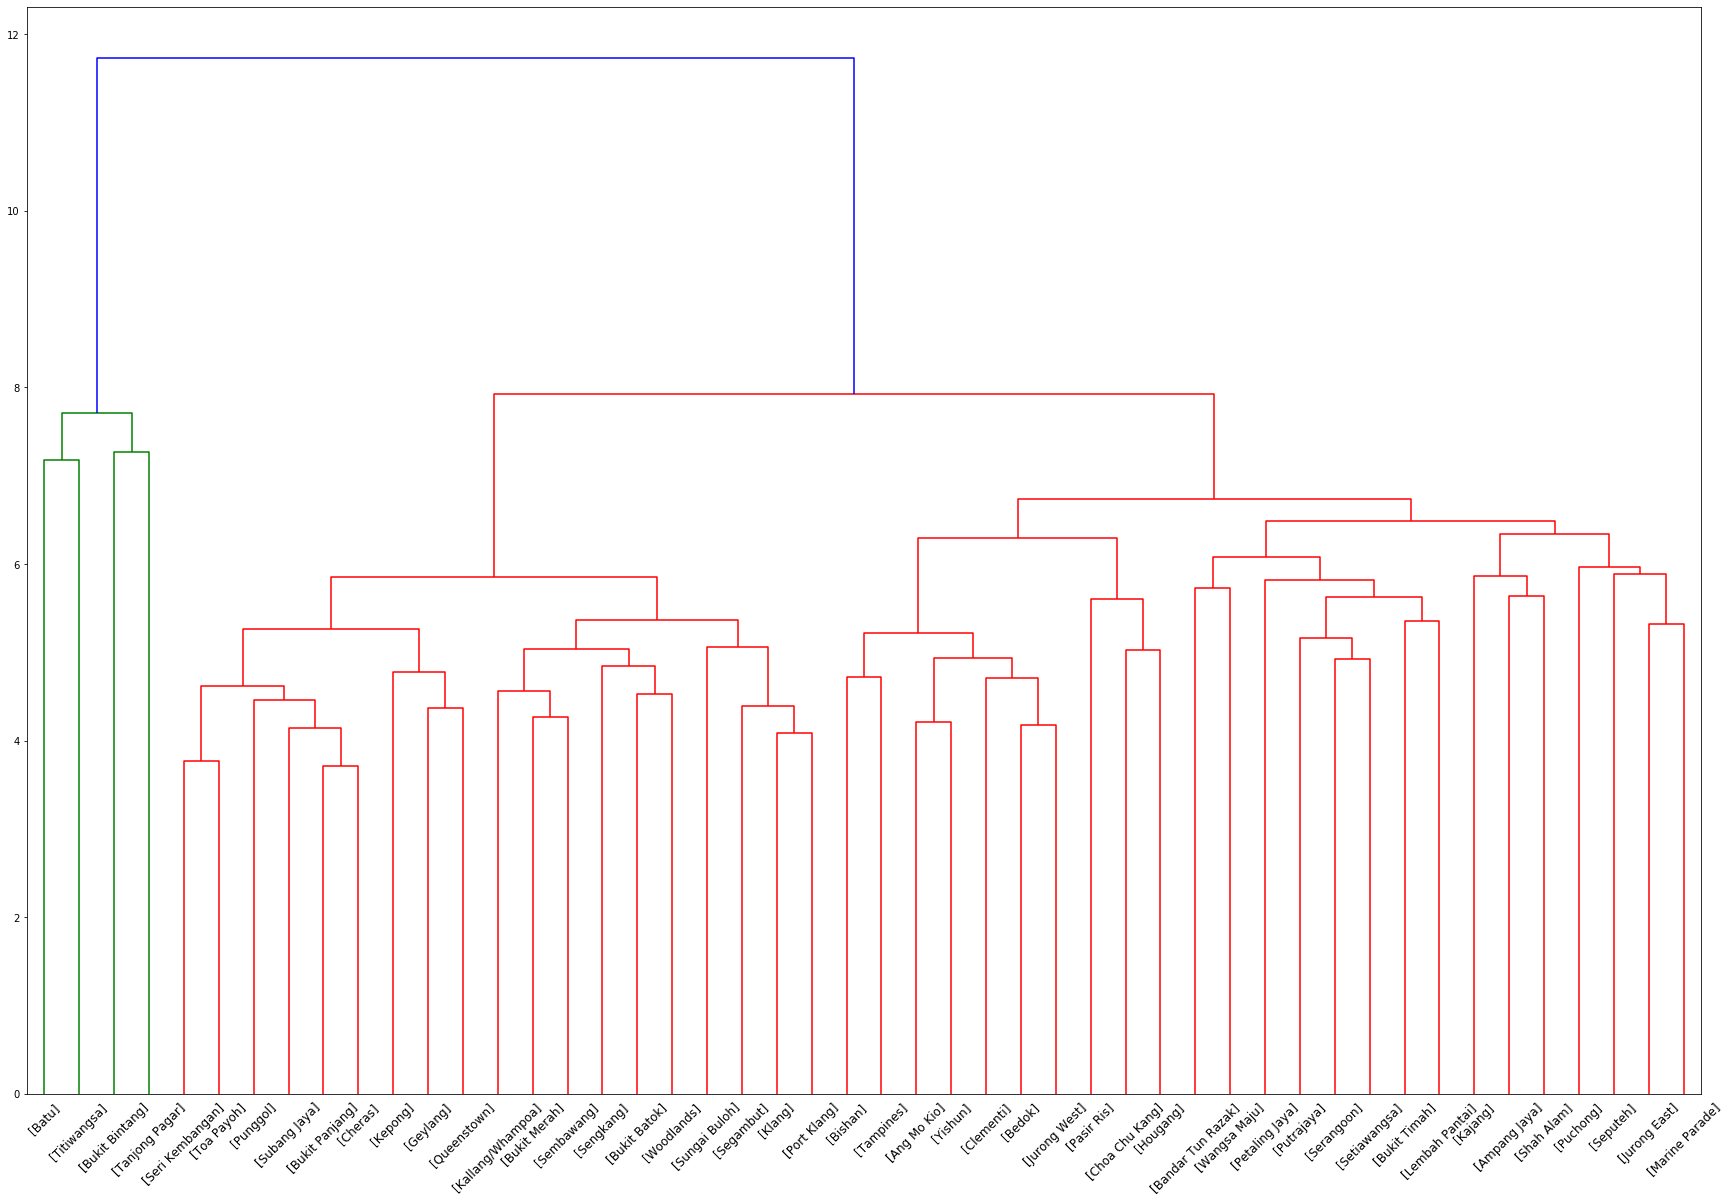

In [164]:

cities_fig = pylab.figure(figsize=(30,20))
def cities_llf(id):
    return '[%s]' % (venues_grouped['Neighborhood'][id] )
    
cities_dendro = hierarchy.dendrogram(cities_Z,  leaf_label_func=cities_llf, leaf_rotation=45, leaf_font_size =12, orientation = 'top')

In [130]:
from sklearn.metrics.pairwise import cosine_similarity

In [133]:
corr = cosine_similarity(data_grouped)

In [135]:
names = [i for i in list(cities['Areas'])]

In [136]:
len(names)

48

In [140]:
df = pd.DataFrame(corr, columns = names, index=names)
df.head()

,Ang Mo Kio,Bedok,Bishan,Bukit Batok,Bukit Merah,Bukit Panjang,Bukit Timah,Choa Chu Kang,Clementi,Geylang,...,Petaling Jaya,Putrajaya,Kajang,Klang,Puchong,Port Klang,Sungai Buloh,Ampang Jaya,Shah Alam,Seri Kembangan
Ang Mo Kio,1.000000,0.308226,0.318142,0.157243,0.533988,0.301941,0.234729,0.181174,0.623332,0.026688,...,0.496961,0.138675,0.552894,0.373555,0.127661,0.020174,0.533544,0.423077,0.489535,0.329507
Bedok,0.308226,1.000000,0.314945,0.092656,0.697860,0.710569,0.589660,0.222506,0.455961,0.311376,...,0.215635,0.147087,0.328975,0.465552,0.397187,0.021398,0.604669,0.353553,0.567308,0.688712
Bishan,0.318142,0.314945,1.000000,0.000000,0.260287,0.210732,0.122628,0.094650,0.133345,0.132453,...,0.280276,0.000000,0.334637,0.208570,0.147836,0.000000,0.253917,0.349957,0.202465,0.120247
Bukit Batok,0.157243,0.092656,0.000000,1.000000,0.155936,0.077152,0.075761,0.389841,0.153781,0.109109,...,0.253966,0.094491,0.027566,0.152721,0.365342,0.123718,0.134463,0.157243,0.129719,0.099054
Bukit Merah,0.533988,0.697860,0.260287,0.155936,1.000000,0.684248,0.523752,0.244681,0.671442,0.208422,...,0.302420,0.103142,0.376121,0.593879,0.427275,0.045015,0.668636,0.486310,0.707974,0.681171


In [141]:
df

,Ang Mo Kio,Bedok,Bishan,Bukit Batok,Bukit Merah,Bukit Panjang,Bukit Timah,Choa Chu Kang,Clementi,Geylang,...,Petaling Jaya,Putrajaya,Kajang,Klang,Puchong,Port Klang,Sungai Buloh,Ampang Jaya,Shah Alam,Seri Kembangan
Ang Mo Kio,1.000000,0.308226,0.318142,0.157243,0.533988,0.301941,0.234729,0.181174,0.623332,0.026688,...,0.496961,0.138675,0.552894,0.373555,0.127661,0.020174,0.533544,0.423077,0.489535,0.329507
Bedok,0.308226,1.000000,0.314945,0.092656,0.697860,0.710569,0.589660,0.222506,0.455961,0.311376,...,0.215635,0.147087,0.328975,0.465552,0.397187,0.021398,0.604669,0.353553,0.567308,0.688712
Bishan,0.318142,0.314945,1.000000,0.000000,0.260287,0.210732,0.122628,0.094650,0.133345,0.132453,...,0.280276,0.000000,0.334637,0.208570,0.147836,0.000000,0.253917,0.349957,0.202465,0.120247
Bukit Batok,0.157243,0.092656,0.000000,1.000000,0.155936,0.077152,0.075761,0.389841,0.153781,0.109109,...,0.253966,0.094491,0.027566,0.152721,0.365342,0.123718,0.134463,0.157243,0.129719,0.099054
Bukit Merah,0.533988,0.697860,0.260287,0.155936,1.000000,0.684248,0.523752,0.244681,0.671442,0.208422,...,0.302420,0.103142,0.376121,0.593879,0.427275,0.045015,0.668636,0.486310,0.707974,0.681171
Bukit Panjang,0.301941,0.710569,0.210732,0.077152,0.684248,1.000000,0.654654,0.263172,0.486443,0.294628,...,0.224440,0.000000,0.193535,0.525801,0.432196,0.066815,0.556741,0.325530,0.650521,0.695436
Bukit Timah,0.234729,0.589660,0.122628,0.075761,0.523752,0.654654,1.000000,0.275659,0.434959,0.270031,...,0.163256,0.133631,0.214412,0.296972,0.356749,0.087482,0.528221,0.259437,0.550350,0.672398
Choa Chu Kang,0.181174,0.222506,0.094650,0.389841,0.244681,0.263172,0.275659,1.000000,0.119900,0.000000,...,0.277218,0.000000,0.240717,0.333406,0.455760,0.090030,0.195698,0.386187,0.404557,0.259494
Clementi,0.623332,0.455961,0.133345,0.153781,0.671442,0.486443,0.434959,0.119900,1.000000,0.167789,...,0.241432,0.116248,0.356086,0.328798,0.128418,0.025367,0.689264,0.338534,0.455961,0.597117
Geylang,0.026688,0.311376,0.132453,0.109109,0.208422,0.294628,0.270031,0.000000,0.167789,1.000000,...,0.141069,0.288675,0.000000,0.058321,0.106299,0.251976,0.342327,0.080064,0.056614,0.302614


In [142]:
df.to_csv('towns_similarity.csv')

In [148]:
amk_sim = df['Ang Mo Kio'].iloc[27:].to_frame()
amk_sim.head()

,Ang Mo Kio
Batu,0.558508
Bukit Bintang,0.248069
Cheras,0.163430
Kepong,0.615525
Lembah Pantai,0.765057


In [149]:
amk_sim.sort_values(['Ang Mo Kio'],ascending=False)

,Ang Mo Kio
Lembah Pantai,0.765057
Wangsa Maju,0.709410
Kepong,0.615525
Batu,0.558508
Kajang,0.552894
Sungai Buloh,0.533544
Petaling Jaya,0.496961
Shah Alam,0.489535
Ampang Jaya,0.423077
Klang,0.373555


In [150]:
klang_sim = df['Port Klang'].iloc[:27].to_frame().sort_values(['Port Klang'], ascending=False)

In [151]:
klang_sim

,Port Klang
Geylang,0.251976
Pasir Ris,0.179374
Jurong West,0.136320
Bukit Batok,0.123718
Woodlands,0.100791
Choa Chu Kang,0.090030
Bukit Timah,0.087482
Kallang/Whampoa,0.075094
Queenstown,0.067344
Bukit Panjang,0.066815
